## Extract reviews of any product from ecommerce website like amazon, Perform emotion mining



In [1]:
import numpy as np
import pandas as pd
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk import tokenize

%matplotlib inline

In [5]:
# extracted amazon customer reviews of product using scrapy and spider

df_reviews = pd.read_csv('extract_reviews_SparxMensRunningShoes.csv')
df_reviews

,stars,comment
0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n As a first...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n excellant ...
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Good\n\n \n
3,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Not value ...
4,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n As a first...
...,...,...
1195,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Nice one i...
1196,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n The best p...
1197,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Size chart...
1198,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n \n...


In [15]:
# Remove both the leading and the trailing characters
df_reviews = [comment.strip() for comment in df_reviews.comment]

# Removes empty strings, because they are considered in Python as False
df_reviews = [comment for comment in df_reviews if comment]

In [16]:
df_reviews[0:10]

['As a first impression shoes are very nice by fitting and comfort. It weighs around 290gm per shoe.Shoe sole is very soft.I will update again the review after using it for 1 month.',
 'excellant running shoes for road as well as treadmill, these are third shoes from this brand. real value for money. gives thesame comfort where for other brands we pay 3000 and above.',
 'Good',
 'Not value for money ,I feel cheated as first it was sold for 750 approx then price was increased to 1150 approx , then also after reading reviews i bought it ,but quality is not upto the mark .I was given a used shoes as the soles were rubbed . Inner fitting is bit tight as well . Not at happy with the product , I guess some reviews are fake or paid.',
 'As a first impression shoes are very nice by fitting and comfort. It weighs around 290gm per shoe.Shoe sole is very soft.I will update again the review after using it for 1 month.',
 'As a first impression shoes are very nice by fitting and comfort. It weighs 

In [9]:
# For Sentiment analysis

afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [11]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [17]:
sentences = tokenize.sent_tokenize(" ".join(df_reviews))
sentences[5:15]

['Good Not value for money ,I feel cheated as first it was sold for 750 approx then price was increased to 1150 approx , then also after reading reviews i bought it ,but quality is not upto the mark .I was given a used shoes as the soles were rubbed .',
 'Inner fitting is bit tight as well .',
 'Not at happy with the product , I guess some reviews are fake or paid.',
 'As a first impression shoes are very nice by fitting and comfort.',
 'It weighs around 290gm per shoe.Shoe sole is very soft.I will update again the review after using it for 1 month.',
 'As a first impression shoes are very nice by fitting and comfort.',
 'It weighs around 290gm per shoe.Shoe sole is very soft.I will update again the review after using it for 1 month.',
 'As a first impression shoes are very nice by fitting and comfort.',
 'It weighs around 290gm per shoe.Shoe sole is very soft.I will update again the review after using it for 1 month.',
 'As a first impression shoes are very nice by fitting and comfort

In [18]:
df_reviews2 = pd.DataFrame(sentences, columns=['sentence'])
df_reviews2

,sentence
0,As a first impression shoes are very nice by f...
1,It weighs around 290gm per shoe.Shoe sole is v...
2,excellant running shoes for road as well as tr...
3,real value for money.
4,gives thesame comfort where for other brands w...
...,...
2156,❌Overall best shoesI personally used for runni...
2157,not found useful Your browser does not support...
2158,Luxury.I exhanged 8 number shoes with 7.I boug...
2159,Your browser does not support HTML5 video.


In [19]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [21]:
# Custom function :score each word in a sentence in lemmatised form, 
# but calculate the score for the whole original sentence.

nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [22]:
# Test that it works
calculate_sentiment(text = 'amazing')

4

In [23]:
df_reviews2['sentiment_value'] = df_reviews2['sentence'].apply(calculate_sentiment)

In [24]:
# Words in the sentence

df_reviews2['word_count'] = df_reviews2['sentence'].str.split().apply(len)
df_reviews2['word_count'].head(10)

0    12
1    21
2    16
3     4
4    12
5    51
6     8
7    15
8    12
9    21
Name: word_count, dtype: int64

In [29]:
df_reviews2.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
848,"Not value for money ,I feel cheated as first i...",-2,50
1871,"Not value for money ,I feel cheated as first i...",-2,50
1788,"Not value for money ,I feel cheated as first i...",-2,50
1755,"Not value for money ,I feel cheated as first i...",-2,50
1818,"Not value for money ,I feel cheated as first i...",-2,50
...,...,...,...
119,"Very good product as I expected , well design ...",18,61
707,"Very good product as I expected , well design ...",18,61
1390,"Very good product as I expected , well design ...",18,61
2132,"Very good product as I expected , well design ...",18,61


In [28]:
# Sentiment score of the whole review

df_reviews2['sentiment_value'].describe()

count    2161.000000
mean        3.430356
std         4.173981
min        -2.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        18.000000
Name: sentiment_value, dtype: float64

In [30]:
# Sentiment score of the whole review

df_reviews2[df_reviews2['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,It weighs around 290gm per shoe.Shoe sole is v...,0,21
2,excellant running shoes for road as well as tr...,0,16
3,real value for money.,0,4
6,Inner fitting is bit tight as well .,0,8
7,"Not at happy with the product , I guess some r...",-1,15


In [33]:
df_reviews2[df_reviews2['sentiment_value']>=15].head()

,sentence,sentiment_value,word_count
111,"Very good product as I expected , well design ...",15,62
119,"Very good product as I expected , well design ...",18,61
144,"Very good product as I expected , well design ...",18,61
265,"Very good product as I expected , well design ...",18,61
273,"Very good product as I expected , well design ...",18,61


In [35]:
# Add index column

df_reviews2['index'] = range(0,len(df_reviews2))
df_reviews2

,sentence,sentiment_value,word_count,index
0,As a first impression shoes are very nice by f...,5,12,0
1,It weighs around 290gm per shoe.Shoe sole is v...,0,21,1
2,excellant running shoes for road as well as tr...,0,16,2
3,real value for money.,0,4,3
4,gives thesame comfort where for other brands w...,1,12,4
...,...,...,...,...
2156,❌Overall best shoesI personally used for runni...,7,40,2156
2157,not found useful Your browser does not support...,4,10,2157
2158,Luxury.I exhanged 8 number shoes with 7.I boug...,7,63,2158
2159,Your browser does not support HTML5 video.,2,7,2159


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

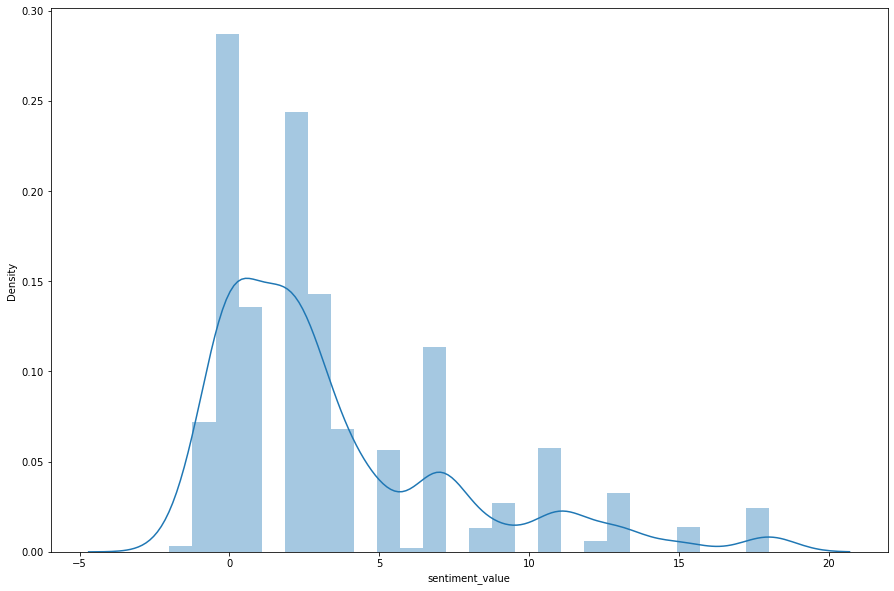

In [36]:
# Plot the sentiment values

plt.figure(figsize=(15, 10))
sns.distplot(df_reviews2['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

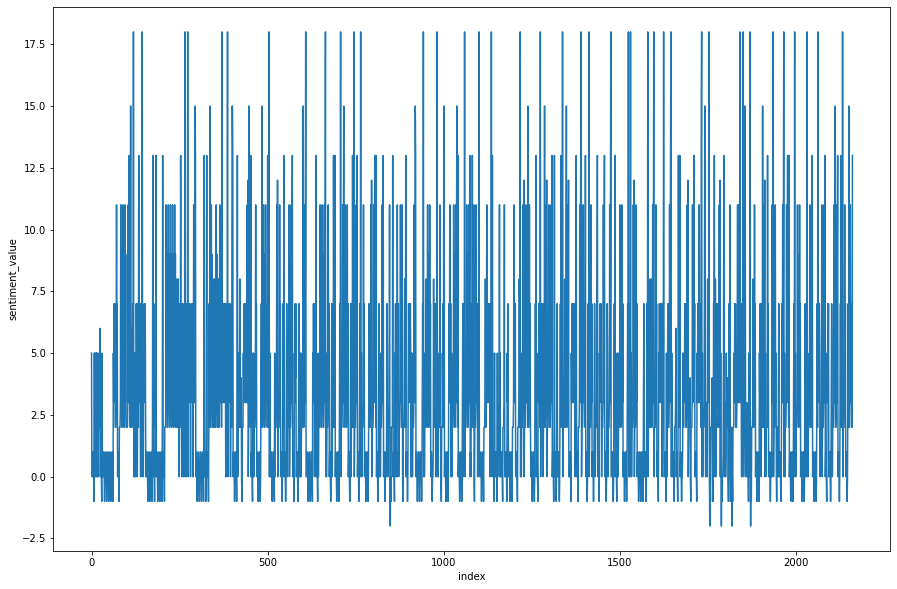

In [38]:
# Line plot for sentiment values

plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value', x='index', data=df_reviews2)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

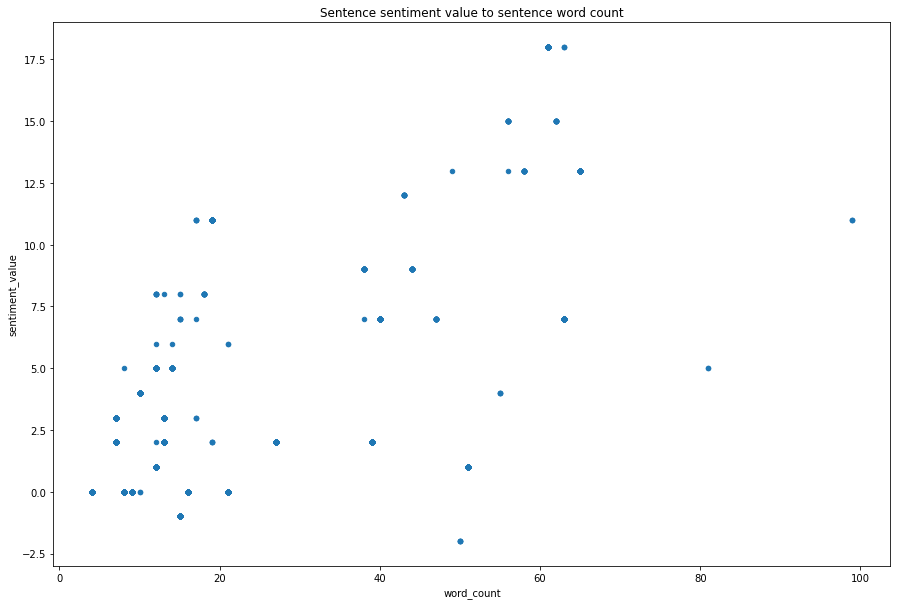

In [39]:
# Correlation

df_reviews2.plot.scatter(x='word_count', y='sentiment_value', figsize=(15, 10), 
                     title='Sentence sentiment value to sentence word count')